<a href="https://colab.research.google.com/github/imnadiarasheed/ML/blob/main/Assign_2(LR_40).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from time import time # for timing predictions
from sklearn.datasets import fetch_lfw_people  # sklearn.datasets fetch_ltw_people contains useful functions for loading the data
from sklearn.model_selection import train_test_split # for creating test and train split
from sklearn.decomposition import PCA #for PCA algorithm
from sklearn.model_selection import GridSearchCV # tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method
from sklearn.svm import SVC # to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #  report the performance evaluation metric
import matplotlib.pyplot as plt #for displaying the photos with predictions
import seaborn as sns

Use sklearn.datasets.fetch_lfw_people function to retreive the data from the flw dataset in a useful format.

In [ ]:
def getDataset():
    ds = fetch_lfw_people(min_faces_per_person=40, resize=0.5) # get dataset labelled faces in the wild data with minimum number of faces per person
    
    return ds

In [ ]:
ds = getDataset() # get the data set

In [ ]:
def getDatasetDetails(ds):
    n_samples, height, width = ds.images.shape # gets number of samples, height and width of the images

    X = ds.data # sets X as the data
    n_features = X.shape[1] # gets the num of features

    y = ds.target # the label to predict is the id of the person
    target_names = ds.target_names # gets target names
    n_classes = target_names.shape[0] # gets classes
    
    #prints num of samples, features and classes
    print("Total DATASET size:")
    print("n_samples: %d" % n_samples)
    print("n_features: %d" % n_features)
    print("n_classes: %d" % n_classes)

    return n_samples, height, width, X, n_features, y, target_names, n_classes # returns values

In [ ]:
def splitData(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # splits data 

    return X_train, X_test, y_train, y_test # returns split data

In [ ]:
def dimensionalityReductionPCA(v_captured, X_train):
    #print("Extracting the top %d eigenfaces from %d faces"% (v_captured, X_train.shape[0])) # prints number of fisherfaces extracted from num of faces
    t0 = time() # sets time flag
    
    pca = PCA(n_components=v_captured,whiten=True).fit(X_train) # Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
    
    print("done in %0.3fs" % (time() - t0)) # prints the calculated time taken to process PCA
    print(f"Components Captured : {pca.n_components_}") # Components captured by PCA
    print(f"Variance Captured : {sum(pca.explained_variance_ratio_)}") # variance captured by PCA

    return pca, pca.n_components_ # returns values

In [ ]:
def trainTextTransformModel(model, X_train, X_test):
    #print("Projecting the input data on the eigenfaces orthonormal basis") # print process of projecting input data
    t0 = time() # set time flag
    
    X_train_model = model.transform(X_train) # transform X train model
    X_test_model = model.transform(X_test) # transform X test model
    #print("done in %0.3fs" % (time() - t0)) # print calculated time for transforming model

    return X_train_model, X_test_model # return values

In [ ]:
def classificationSvc(X_train_model, y_train):
    print("Fitting the classifier to the training set") # prints the process of fitting the classifier
    t0 = time() # sets time flag
    param = {'C': [1e6,1e7,1e8,1e9,1e10], 'max_iter':[100,500,1000]}
    clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
    clf = clf.fit(X_train_model, y_train) # fits the clf model
    print("done in %0.3fs" % (time() - t0)) # prints the calculated time to create grid, process and fit clf
    print("Best estimator found by grid search:") # prints the best estimator using the grid search
    print(clf.best_estimator_)

    return clf # return value

In [ ]:
def prediction(model, data):
    print("Predicting people's names on the test set") # printing the process of predicting names on test set
    t0 = time() # set time flag
    y_pred = model.predict(data) # create prediction
    print("done in %0.3fs" % (time() - t0)) # print the calculated time to process prediction

    return y_pred # return values

In [ ]:
def Accuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)
    #print(classification_report(y_test, y_pred)) # prints classification report
    #print(confusion_matrix(y_test, y_pred, labels=range(n_classes))) # prints confusion matrix

In [ ]:
n_samples, height, width, X, n_features, y, target_names, n_classes = getDatasetDetails(ds) # use getDatasetDetails to get dataset details

Total DATASET size:
n_samples: 1867
n_features: 2914
n_classes: 19


In [ ]:
X_train, X_test, y_train, y_test = splitData(X, y) #split data into test and train (x and y)

In [ ]:
variance_captured=[]
principal_components=[]
accuracy=[]

**Accuracy Check W/O PCA**

In [ ]:
clf = classificationSvc(X_train, y_train) # create clf model using classification function

Fitting the classifier to the training set


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

done in 463.217s
Best estimator found by grid search:
LogisticRegression(C=1000000.0, fit_intercept=False, multi_class='ovr')


In [ ]:
y_pred = prediction(clf, X_test) # create prediction

Predicting people's names on the test set
done in 0.011s


In [ ]:
acc = Accuracy(y_test, y_pred)
print(acc)

0.6497326203208557


**PCA (97%)**

In [ ]:
v_captured = .97
variance_captured.append(v_captured)

pca, n_comp = dimensionalityReductionPCA(v_captured, X_train) # create eigenfaces and pca values from function taking training data and components, etc
principal_components.append(n_comp)
X_train_pca, X_test_pca = trainTextTransformModel(pca, X_train, X_test) # create pca train and test values using function

done in 2.441s
Components Captured : 232
Variance Captured : 0.9700156100443564


In [ ]:
clf = classificationSvc(X_train_pca, y_train) # create clf model using classification function

Fitting the classifier to the training set
done in 12.669s
Best estimator found by grid search:
LogisticRegression(C=1000000.0, fit_intercept=False, multi_class='ovr')


In [ ]:
y_pred = prediction(clf, X_test_pca) # create prediction

Predicting people's names on the test set
done in 0.001s


In [ ]:
acc = Accuracy(y_test, y_pred)
print(acc)
accuracy.append(acc)

0.6898395721925134


**PCA (95%)**

In [ ]:
v_captured = .95
variance_captured.append(v_captured)

pca, n_comp = dimensionalityReductionPCA(v_captured, X_train) # create eigenfaces and pca values from function taking training data and components, etc
principal_components.append(n_comp)
X_train_pca, X_test_pca = trainTextTransformModel(pca, X_train, X_test) # create pca train and test values using function

done in 2.430s
Components Captured : 161
Variance Captured : 0.9500120573211461


In [ ]:
clf = classificationSvc(X_train_pca, y_train) # create clf model using classification function

Fitting the classifier to the training set
done in 12.495s
Best estimator found by grid search:
LogisticRegression(C=1000000.0, fit_intercept=False, multi_class='ovr')


In [ ]:
y_pred = prediction(clf, X_test_pca) # create prediction

Predicting people's names on the test set
done in 0.003s


In [ ]:
acc = Accuracy(y_test, y_pred)
print(acc)
accuracy.append(acc)

0.7352941176470589


**PCA (93%)**

In [ ]:
v_captured = .93
variance_captured.append(v_captured)

pca, n_comp = dimensionalityReductionPCA(v_captured, X_train) # create eigenfaces and pca values from function taking training data and components, etc
principal_components.append(n_comp)
X_train_pca, X_test_pca = trainTextTransformModel(pca, X_train, X_test) # create pca train and test values using function

done in 2.485s
Components Captured : 121
Variance Captured : 0.9300560412812047


In [ ]:
clf = classificationSvc(X_train_pca, y_train) # create clf model using classification function

Fitting the classifier to the training set
done in 9.077s
Best estimator found by grid search:
LogisticRegression(C=1000000.0, fit_intercept=False, multi_class='ovr')


In [ ]:
y_pred = prediction(clf, X_test_pca) # create prediction

Predicting people's names on the test set
done in 0.002s


In [ ]:
acc = Accuracy(y_test, y_pred)
print(acc)
accuracy.append(acc)

0.7352941176470589


**Plots**

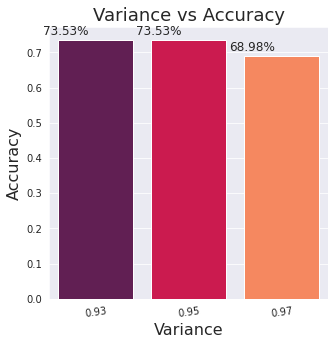

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("darkgrid")
ax = sns.barplot(x=variance_captured, y=accuracy, palette = "rocket", saturation =1.5)
plt.xlabel("Variance", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Variance vs Accuracy", fontsize = 18)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/10, y + height*1.02), ha='center', fontsize = 'large')
plt.show()

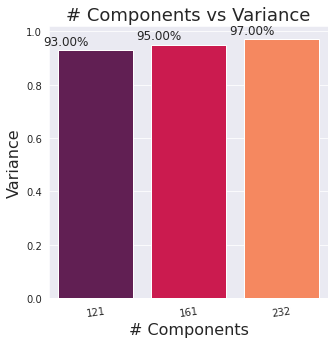

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("darkgrid")
ax = sns.barplot(x=principal_components, y=variance_captured, palette = "rocket", saturation =1.5)
plt.xlabel("# Components", fontsize = 16)
plt.ylabel("Variance", fontsize = 16)
plt.title("# Components vs Variance", fontsize = 18)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/10, y + height*1.02), ha='center', fontsize = 'large')
plt.show()

In [ ]:
print(accuracy)
print(variance_captured)
print(principal_components)

"""plt.figure(figsize=(8, 4))
plt.plot(principal_components, variance_captured, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('# Components vs Variance')
plt.xlabel('# Components')
plt.ylabel('Variance')

plt.figure(figsize=(8, 4))
plt.plot(variance_captured, accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Variance vs Accuracy')
plt.xlabel('Variance')
plt.ylabel('Accuracy')"""

[0.6898395721925134, 0.7352941176470589, 0.7352941176470589]
[0.97, 0.95, 0.93]
[232, 161, 121]


"plt.figure(figsize=(8, 4))\nplt.plot(principal_components, variance_captured, color='green', linestyle='dashed', marker='o',\n         markerfacecolor='blue', markersize=10)\nplt.title('# Components vs Variance')\nplt.xlabel('# Components')\nplt.ylabel('Variance')\n\nplt.figure(figsize=(8, 4))\nplt.plot(variance_captured, accuracy, color='green', linestyle='dashed', marker='o',\n         markerfacecolor='blue', markersize=10)\nplt.title('Variance vs Accuracy')\nplt.xlabel('Variance')\nplt.ylabel('Accuracy')"